In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

Generating the original data an adding noize to it

In [49]:
np.random.seed(123)
alpha = np.random.rand()
beta = np.random.rand()
x_k = np.arange(101)/100
delta_k = np.random.randn(101)
y_correct = alpha*x_k + beta
y_k = y_correct + delta_k
print(f"alpha = {alpha}, beta = {beta}")

alpha = 0.6964691855978616, beta = 0.28613933495037946


### Creating the target function for linear approximant and rational approximant

In [53]:
def target_func_linear(params, x_data, y_data):
    a,b = params
    F_x = a * x_data + b
    residuals = F_x - y_data
    return np.sum(residuals**2)

def target_func_rational(params, x_data, y_data):
    a, b = params
    denominator = 1 + b * x_data
    if np.any(np.abs(denominator) < 1e-10):
        return 1e10
    F_x = a / denominator
    residuals = F_x - y_data
    return np.sum(residuals**2)

### Gradient descent Linear

Optimization terminated successfully.
         Current function value: 129.973280
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
 a_best= 0.6740737156318063, b_best = 0.3188779382477158, f-calculations = 15, iterations = 2


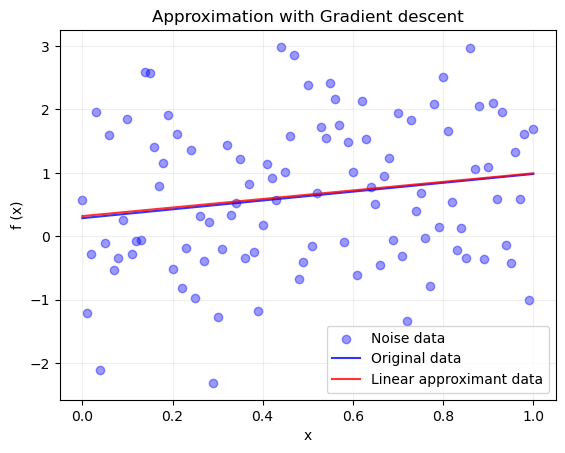

In [55]:
def gradient_descent(target_func, params, x_data, y_data):

    result = scipy.optimize.minimize(
        target_func,
        params,
        args=(x_data, y_data),
        method='BFGS',
        options={'disp': True, 'return_all': True}
    )
    
    a_best, b_best = result.x
    f_calculations = result.nfev 
    iterations = result.nit    
    
    return [a_best, b_best, f_calculations, iterations]

result_linear_gd = gradient_descent(target_func_linear, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_linear_gd[0]}, b_best = {result_linear_gd[1]}, f-calculations = {result_linear_gd[2]}, iterations = {result_linear_gd[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_l_gd = result_linear_gd[0]*x_k + result_linear_gd[1]
plt.plot(x_k, y_l_gd, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Gradient descent')
plt.legend()
plt.show()

### Gradient descent Rational

Optimization terminated successfully.
         Current function value: 130.919561
         Iterations: 13
         Function evaluations: 57
         Gradient evaluations: 19
 a_best= 0.46394059181925695, b_best = -0.5301485382972214, f-calculations = 57, iterations = 13


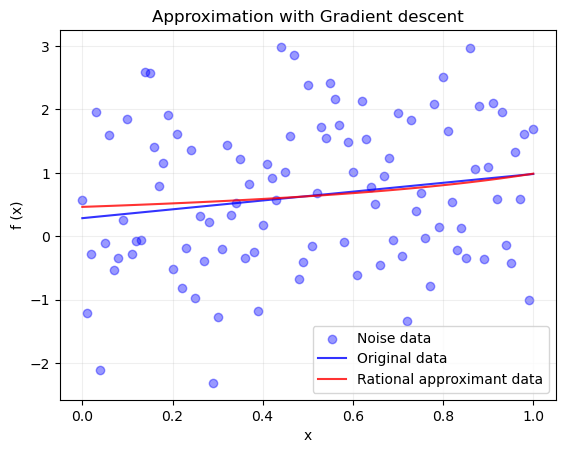

In [67]:
result_rational_gd = gradient_descent(target_func_rational, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_rational_gd[0]}, b_best = {result_rational_gd[1]}, f-calculations = {result_rational_gd[2]}, iterations = {result_rational_gd[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_r_gd = result_rational_gd[0]/(1 + result_rational_gd[1]*x_k)
plt.plot(x_k, y_r_gd, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Gradient descent')
plt.legend()
plt.show()

### Conjugate gradient descent Linear

Optimization terminated successfully.
         Current function value: 129.973280
         Iterations: 4
         Function evaluations: 42
         Gradient evaluations: 14
 a_best= 0.674073762212333, b_best = 0.3188778660864317, f-calculations = 42, iterations = 4


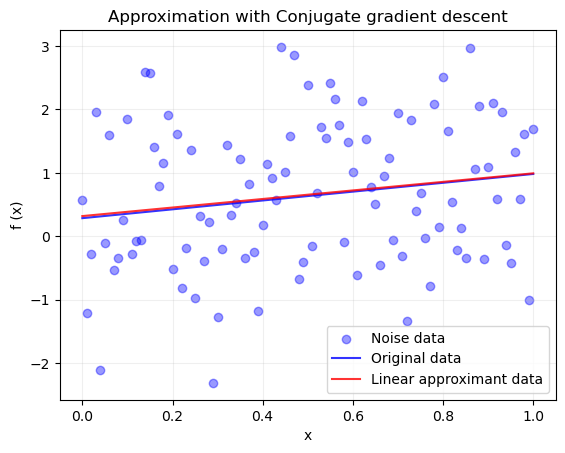

In [99]:
def conjugate_gradient(target_func, params, x_data, y_data):
    
    result = scipy.optimize.minimize(
        target_func,
        params,
        args=(x_data, y_data),
        method='CG',
        options={'disp': True, 'gtol': 1e-6, 'maxiter': 1000}
    )
    
    a_best, b_best = result.x
    f_calculations = result.nfev 
    iterations = result.nit 
    
    return [a_best, b_best, f_calculations, iterations]

result_linear_cg = conjugate_gradient(target_func_linear, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_linear_cg[0]}, b_best = {result_linear_cg[1]}, f-calculations = {result_linear_cg[2]}, iterations = {result_linear_cg[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_l_cg = result_linear_cg[0]*x_k + result_linear_cg[1]
plt.plot(x_k, y_l_cg, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Conjugate gradient descent')
plt.legend()
plt.show()

### Conjugate gradient descent Rational

Optimization terminated successfully.
         Current function value: 130.919561
         Iterations: 13
         Function evaluations: 114
         Gradient evaluations: 38
 a_best= 0.4639406242894306, b_best = -0.5301484789321136, f-calculations = 114, iterations = 13


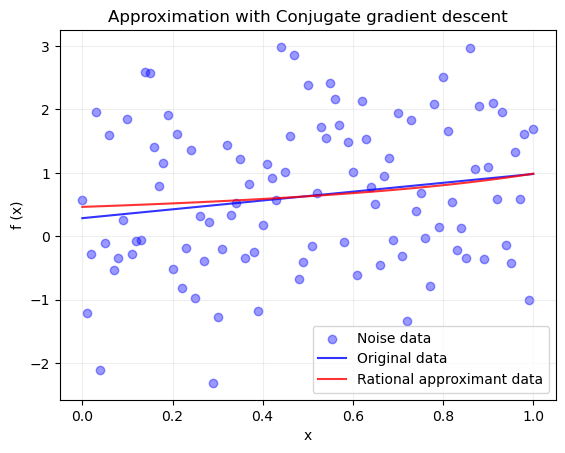

In [101]:
result_rational_cg = conjugate_gradient(target_func_rational, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_rational_cg[0]}, b_best = {result_rational_cg[1]}, f-calculations = {result_rational_cg[2]}, iterations = {result_rational_cg[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
#y_r_cg = result_rational_cg[0]*x_k + result_rational_cg[1]
y_r_cg = result_rational_cg[0]/(1 + result_rational_cg[1]*x_k)
plt.plot(x_k, y_r_cg, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Conjugate gradient descent')
plt.legend()
plt.show()

### Newton's method Linear

Optimization terminated successfully.
         Current function value: 129.973280
         Iterations: 3
         Function evaluations: 3
         Gradient evaluations: 3
         Hessian evaluations: 3
 a_best= 0.6740737518057157, b_best = 0.31887788252937177, f-calculations = 3, iterations = 3


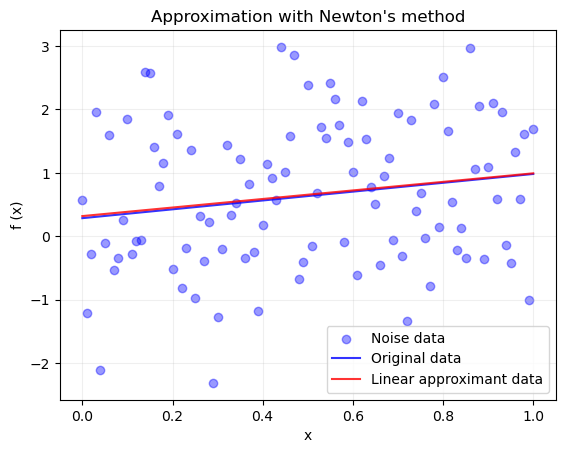

In [95]:
def gradient_linear(params, x_data, y_data):
    
    a, b = params
    n = len(x_data)
    grad_a = 2 * np.sum((a*x_data + b - y_data) * x_data)
    grad_b = 2 * np.sum(a*x_data + b - y_data)
    return np.array([grad_a, grad_b])

def hessian_linear(params, x_data, y_data):
    
    n = len(x_data)
    H = np.zeros((2, 2))
    H[0, 0] = 2 * np.sum(x_data ** 2) 
    H[0, 1] = 2 * np.sum(x_data)    
    H[1, 0] = H[0, 1]                 
    H[1, 1] = 2 * n                   
    return H

def gradient_rational(params, x_data, y_data):
    
    a, b = params
    denominator = 1 + b * x_data
    F_x = a / denominator
    residuals = F_x - y_data
    
    # Производные
    dF_da = 1 / denominator
    dF_db = -a * x_data / (denominator ** 2)
    
    grad_a = 2 * np.sum(residuals * dF_da)
    grad_b = 2 * np.sum(residuals * dF_db)
    
    return np.array([grad_a, grad_b])

def hessian_rational(params, x_data, y_data):

    a, b = params
    denominator = 1 + b * x_data
    F_x = a / denominator
    residuals = F_x - y_data
    
    dF_da = 1 / denominator
    dF_db = -a * x_data / (denominator ** 2)
    
    d2F_da2 = 0
    d2F_dadb = -x_data / (denominator ** 2)
    d2F_db2 = 2 * a * x_data**2 / (denominator ** 3)

    H = np.zeros((2, 2))

    H[0, 0] = 2 * np.sum(dF_da ** 2 + residuals * d2F_da2)

    H[0, 1] = 2 * np.sum(dF_da * dF_db + residuals * d2F_dadb)

    H[1, 1] = 2 * np.sum(dF_db ** 2 + residuals * d2F_db2)

    H[1, 0] = H[0, 1]
    
    return H

def newtons_method(target_func, params, x_data, y_data):
    
    result = scipy.optimize.minimize(
        target_func,
        params,
        args=(x_data, y_data),
        method='Newton-CG', 
        jac=gradient_linear if target_func == target_func_linear else gradient_rational,
        hess=hessian_linear if target_func == target_func_linear else hessian_rational,
        options={
                'disp': True,
                'xtol': 1e-4,  
                'maxiter': 500 
            }
    )
    
    a_best, b_best = result.x
    f_calculations = result.nfev  
    iterations = result.nit       
    
    return [a_best, b_best, f_calculations, iterations]

result_linear_new = newtons_method(target_func_linear, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_linear_new[0]}, b_best = {result_linear_new[1]}, f-calculations = {result_linear_new[2]}, iterations = {result_linear_new[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_l_new = result_linear_new[0]*x_k + result_linear_new[1]
plt.plot(x_k, y_l_new, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Newton\'s method')
plt.legend()
plt.show()

### Newton's method Rational

Optimization terminated successfully.
         Current function value: 130.919561
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
         Hessian evaluations: 13
 a_best= 0.46394064788683437, b_best = -0.5301484508432289, f-calculations = 16, iterations = 13


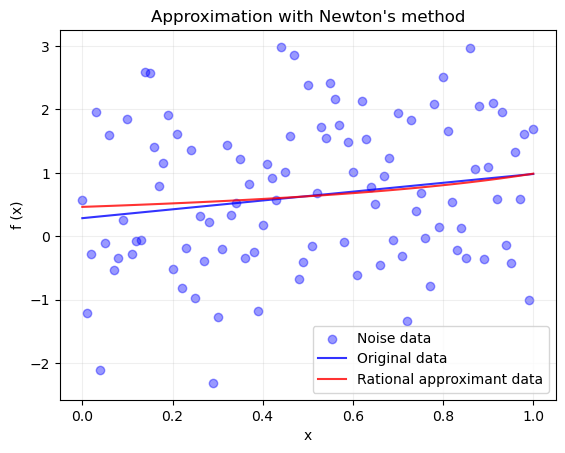

In [97]:
result_rational_new = newtons_method(target_func_rational, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_rational_new[0]}, b_best = {result_rational_new[1]}, f-calculations = {result_rational_new[2]}, iterations = {result_rational_new[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_r_new = result_rational_new[0]/(1 + result_rational_new[1]*x_k)
plt.plot(x_k, y_r_new, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Newton\'s method')
plt.legend()
plt.show()

### Levenberg-Marquardt method Linear

 a_best= 0.6740737518057172, b_best = 0.3188778825293711, f-calculations = 2, iterations = 2


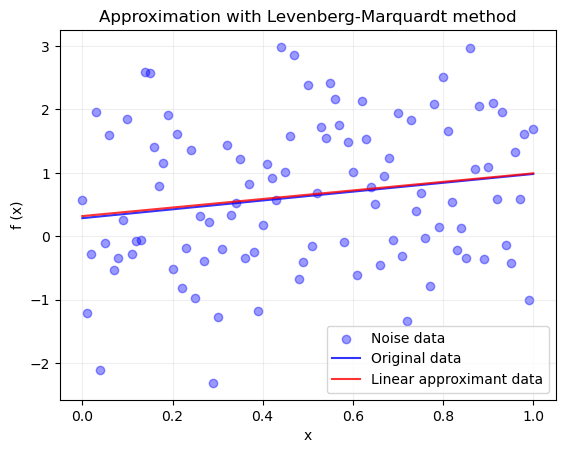

In [120]:
def jacobian_linear(params, x_data, y_data):
    
    a, b = params
    n = len(x_data)
    J = np.zeros((n, 2))
    J[:, 0] = x_data 
    J[:, 1] = 1.0    
    return J

def jacobian_rational(params, x_data, y_data):
    
    a, b = params
    denominator = 1 + b * x_data
    n = len(x_data)
    J = np.zeros((n, 2))
    J[:, 0] = 1 / denominator       
    J[:, 1] = -a * x_data / (denominator ** 2)  
    return J

def residuals_linear(params, x_data, y_data):
    
    a, b = params
    return a * x_data + b - y_data

def residuals_rational(params, x_data, y_data):
    
    a, b = params
    denominator = 1 + b * x_data
    if np.any(np.abs(denominator) < 1e-10):
        return np.ones_like(x_data) * 1e5
    return a / denominator - y_data


def levenberg_marquardt(target_func, initial_params, x_data, y_data):
    
    if target_func == target_func_linear:
        def residuals(params):
            return residuals_linear(params, x_data, y_data)
        
        def jacobian(params):
            return jacobian_linear(params, x_data, y_data)
    else:
        def residuals(params):
            return residuals_rational(params, x_data, y_data)
        
        def jacobian(params):
            return jacobian_rational(params, x_data, y_data)
    
    try:
        result = scipy.optimize.least_squares(
            residuals,
            initial_params,
            jac=jacobian, 
            method='lm',
            xtol=1e-6,
            ftol=1e-6,
            gtol=1e-6,
            max_nfev=1000,
            verbose=0  
        )
        
        a_best, b_best = result.x
        f_calculations = result.nfev
        iterations = result.nfev  
        
        return [a_best, b_best, f_calculations, iterations]
        
    except Exception as e:
        print(f"Error scipy LM: {e}")
        try:
            result = optimize.least_squares(
                residuals,
                initial_params,
                method='lm',
                xtol=1e-6,
                max_nfev=1000
            )
            a_best, b_best = result.x
            f_calculations = result.nfev
            iterations = result.nfev
            return [a_best, b_best, f_calculations, iterations]
        except Exception as e2:
            print(f"Alternative method error: {e2}")
            return None

result_linear_lm = levenberg_marquardt(target_func_linear, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_linear_lm[0]}, b_best = {result_linear_lm[1]}, f-calculations = {result_linear_lm[2]}, iterations = {result_linear_lm[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_l_lm = result_linear_lm[0]*x_k + result_linear_lm[1]
plt.plot(x_k, y_l_lm, 'r-', alpha=0.8, label='Linear approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Levenberg-Marquardt method')
plt.legend()
plt.show()

### Levenberg-Marquardt method Rational

 a_best= 0.4637249917451936, b_best = -0.530582760869657, f-calculations = 11, iterations = 11


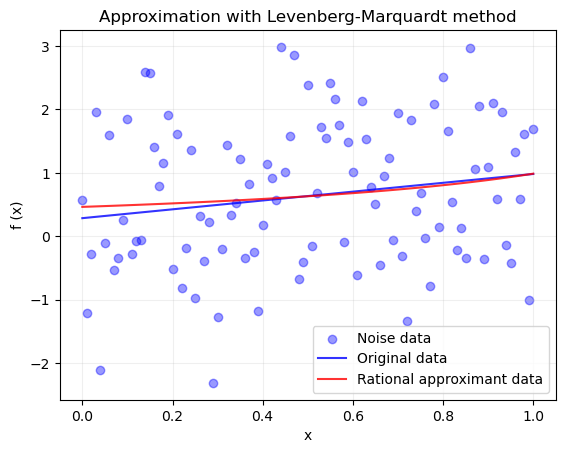

In [109]:
result_rational_lm = levenberg_marquardt(target_func_rational, [-0.5, 0.5], x_k, y_k)
print(f" a_best= {result_rational_lm[0]}, b_best = {result_rational_lm[1]}, f-calculations = {result_rational_lm[2]}, iterations = {result_rational_lm[3]}")

plt.figure()
plt.scatter(x_k,y_k, color='blue', alpha=0.4, label='Noise data')
plt.grid(alpha=0.2)
plt.plot(x_k, y_correct, 'b-',alpha=0.8, label='Original data')
y_r_lm = result_rational_lm[0]/(1 + result_rational_lm[1]*x_k)
plt.plot(x_k, y_r_new, 'r-', alpha=0.8, label='Rational approximant data')
plt.xlabel('x')
plt.ylabel('f (x)')
plt.title ('Approximation with Levenberg-Marquardt method')
plt.legend()
plt.show()

### Results
* Based on the experiments performed, it can be seen that for linear approximation, the calculated coefficients a and b are close to the specified alpha and beta values.
* For rational approximation, the coefficients a and b are different, since a different type of function is used, similar results were obtained in task 2 with zero-order optimization methods.
* For gradient descent, the ratio of the number of iterations and the number of f-calculation is approximately 7 for linear approximation and 4 for rational.
* For the conjugate gradient method, the ratio of the number of iterations and the number of f-calculation is approximately 10 for linear approximation and 8 for rational.
* For the Newtonian method, the number of iterations and the number of f-calculation are commensurate for both types of approximating functions and are small enough for linear approximation.
* For the Levenberg-Marquardt method, the number of iterations and the number of f-calculation are equal in pairs for both types of approximating functions and are quite small.

* If we compare the methods from the second and third laboratory works, the optimization algorithms of the first and second order are performed much faster - in fewer iterations, compared with the algorithms of the zero order. Nevertheless, the approximation results in the second and third laboratory works are close to the original values of the given function, as evidenced by the graphs of the original and experimental data, as well as the coefficients a and b for linear approximation.